In [260]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import scipy.stats as stats

In [261]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Описание задания:

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.



Этапы работы:



Получите и загрузите данные.



In [262]:
titanic_csv = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/05.Data_Quality/train.csv'

Удалите все пропущенные значения и категориальные переменные. Обучите модель. 



In [263]:
titanic_data = pd.read_csv(titanic_csv, index_col='PassengerId')

In [264]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
titanic_data_crude_clean = titanic_data.dropna()  # Датасет после грубого удаления NaN

In [266]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [267]:
titanic_data_crude_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    object 
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


In [268]:
X_data = titanic_data_crude_clean.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) # Обучение модели после грубого удаления пропусков
y_data = titanic_data_crude_clean['Survived']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [270]:
model = LogisticRegression()

In [271]:
model.fit(X_train, y_train)

LogisticRegression()

In [272]:
predictions_crude = model.predict_proba(X_test)

In [273]:
model.score(X_train, y_train)  # Значение точности на тренировочных данных после грубого удаления пропусков

0.7191780821917808

In [274]:
model.score(X_test, y_test) # Значение точности на тестовых данных после грубого удаления пропусков

0.7027027027027027

Выберете и посчитайте метрику качества.



In [275]:
x_line = [0, 1]
y_line = x_line

In [276]:
fpr, tpr, thres = roc_curve(y_test, predictions_crude[:, 1]) # Кривая ROC на данных после грубого удаления пропусков

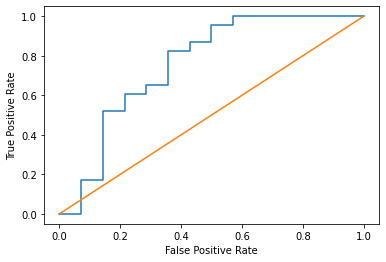

In [277]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_line, y_line)

In [278]:
pr, re, thresh = precision_recall_curve( y_test, predictions_crude[:, 1] ) # Кривая Precision-Recall на данных после грубого удаления пропусков

Text(0, 0.5, 'Recall')

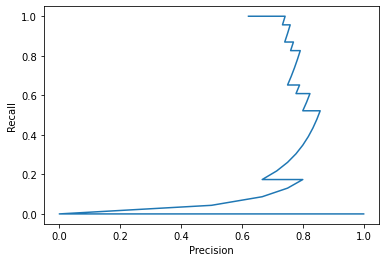

In [279]:
plt.plot(pr, re)
plt.xlabel('Precision')
plt.ylabel('Recall')

Снова загрузите полные данные.



Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
Проверьте данные на наличие пропущенных значений.




In [280]:
titanic_data_fine_clean = titanic_data.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], axis=1)   # Решил удалить номера кают, имена пассажиров, номера билетов, а также данные по порту посадки 
# По поводу удаления данных о порте посадки (Embarked) - считаю эти данные незначимыми для расчета, т.к. глобально порт посадки ни коим образом не влияет на выживаемость пассажиров. 
# Также думаю, что эти данные могут способствовать переобучению модели (система может пытаться выявить закономерности между посадкой с определенного порта и выживаемостью ("подстраиваться под данные"), 
# что может снизить качество прогноза на тестовых данных). В столбце номеров кают (Cabin) очень много пропусков, и я также считаю их не особо значимыми для расчета и потенциально ведущими к переобучению.

In [281]:
titanic_data_fine_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.



In [282]:
percent_loss = 100 - len(titanic_data_crude_clean) /  len(titanic_data) * 100  # titanic_data_crude_clean - это данные после грубого удаления пропусков, titanic_data - это данные до удаления пропусков

percent_loss # потеря данных после грубого удаления пропусков может достигать 79,4%

79.46127946127946

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.




In [283]:
age_median = round(titanic_data_fine_clean['Age'].median(),0) # значения возраста заполнил медианой

In [284]:
titanic_data_fine_clean['Age'].fillna(age_median, inplace=True)

In [285]:
titanic_data_fine_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


In [286]:
titanic_data_fine_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.






In [287]:
def age_group_classifier(dt:pd.core.frame.DataFrame):   # Метод, распределяющий пассажиров по возрастным категориям
  if(dt['Age'] <= 1):
    return 'newborn'
  elif(dt['Age'] < 18):
    return 'child'
  elif(dt['Age'] <60):
    return 'adult'
  elif(dt['Age'] >= 60):
    return 'elderly'

In [288]:
titanic_data_fine_clean['Age_category'] = titanic_data_fine_clean.apply(age_group_classifier, axis=1)

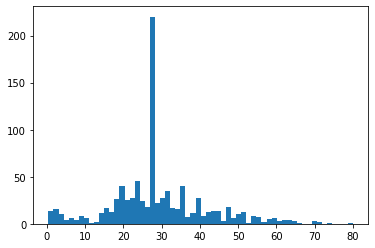

In [289]:
plt.hist(titanic_data_fine_clean['Age'], bins=60)
plt.show()

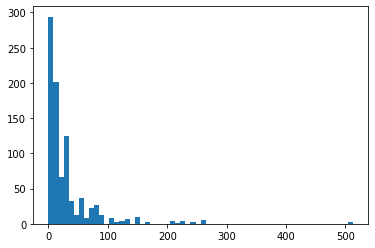

In [290]:
plt.hist(titanic_data_fine_clean['Fare'], bins=60)
plt.show()

In [291]:
# Попробовал удалить выбросы по возрасту и оплате за билет (см.ниже закомментированную строку кода), но вследствие скошенности распределений (в частности, по возрасту), данный способ отсекает очень много данных

age_Q1 =  titanic_data_fine_clean['Age'].quantile(0.25)
age_Q3 =  titanic_data_fine_clean['Age'].quantile(0.75)

fare_Q1 =  titanic_data_fine_clean['Fare'].quantile(0.25)
fare_Q3 =  titanic_data_fine_clean['Fare'].quantile(0.75)

In [292]:
# По гистограмме распределения по стоимости билета есть явный выброс в количестве $500К за билет, оказалось, что таких людей 3, решил их отсечь:

titanic_data_fine_clean_rich = titanic_data_fine_clean[titanic_data_fine_clean['Fare'] >=300]

titanic_data_fine_clean_rich

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_category
PassengerId,,,,,,,,
259,1,1,female,35.0,0,0,512.3292,adult
680,1,1,male,36.0,0,1,512.3292,adult
738,1,1,male,35.0,0,0,512.3292,adult


In [293]:
# titanic_data_fine_clean = titanic_data_fine_clean[(titanic_data_fine_clean['Age'] > age_Q1) & (titanic_data_fine_clean['Age'] < age_Q3) & (titanic_data_fine_clean['Fare'] > fare_Q1) & (titanic_data_fine_clean['Fare'] < fare_Q3)]

titanic_data_fine_clean = titanic_data_fine_clean[titanic_data_fine_clean['Fare'] < 300]



In [294]:
titanic_data_fine_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      888 non-null    int64  
 1   Pclass        888 non-null    int64  
 2   Sex           888 non-null    object 
 3   Age           888 non-null    float64
 4   SibSp         888 non-null    int64  
 5   Parch         888 non-null    int64  
 6   Fare          888 non-null    float64
 7   Age_category  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

*Попробуйте математически преобразовать признак Age.

In [295]:
titanic_data_fine_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_category
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,adult
2,1,1,female,38.0,1,0,71.2833,adult
3,1,3,female,26.0,0,0,7.9250,adult
4,1,1,female,35.0,1,0,53.1000,adult
5,0,3,male,35.0,0,0,8.0500,adult


Text(0.5, 1.0, 'Соотношение выживших и погибших при крушении лайнера "Titanic"')

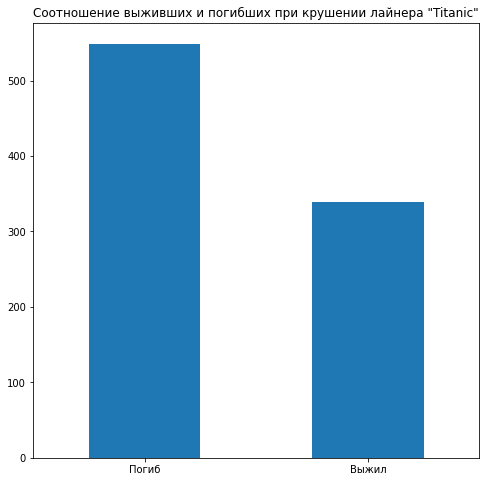

In [296]:
t = titanic_data_fine_clean.groupby('Survived').count()['Pclass']
plt.figure(figsize=(8,8))
t.plot(kind='bar', xlabel='', rot=0).set_xticklabels(['Погиб', 'Выжил'])
plt.title('Соотношение выживших и погибших при крушении лайнера "Titanic"')


Text(0.5, 1.0, 'Распределение погибших / выживших в зависимости от класса каюты')

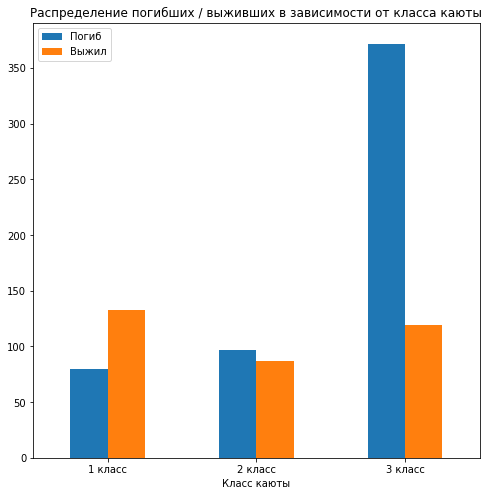

In [297]:
fig, ax = plt.subplots(figsize=(8,8))
titanic_data_fine_clean[['Pclass', 'Survived']].groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', rot=0, ax=ax, xlabel='Класс каюты').set_xticklabels(['1 класс', '2 класс', '3 класс'])
ax.legend(["Погиб", "Выжил"])
plt.title('Распределение погибших / выживших в зависимости от класса каюты')

Text(0.5, 1.0, 'Распределение погибших / выживших в зависимости от пола')

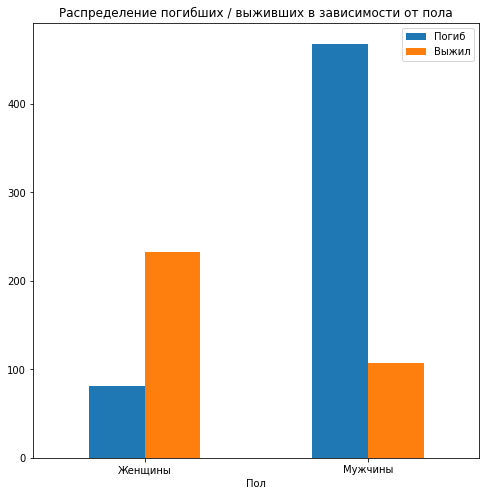

In [298]:
fig, ax = plt.subplots(figsize=(8,8))
titanic_data_fine_clean[['Sex', 'Survived']].groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', rot=0, ax=ax, xlabel='Пол').set_xticklabels(['Женщины', 'Мужчины'])
ax.legend(["Погиб", "Выжил"])
plt.title('Распределение погибших / выживших в зависимости от пола')

Text(0.5, 1.0, 'Распределение погибших / выживших в зависимости от возрастной категории')

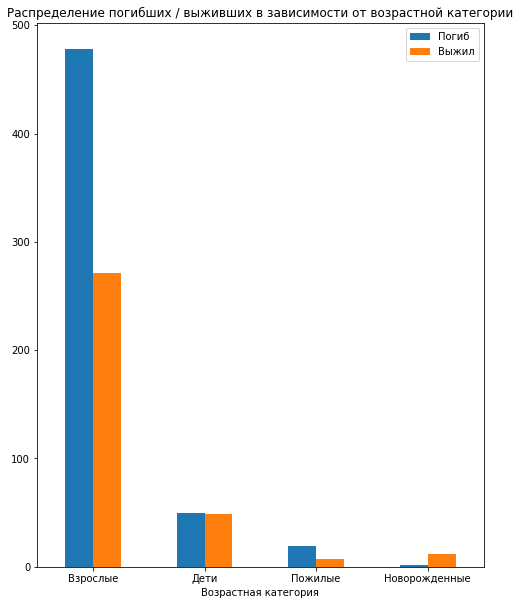

In [299]:
fig, ax = plt.subplots(figsize=(8,10))
titanic_data_fine_clean[['Age_category', 'Survived']].groupby(['Age_category', 'Survived']).size().unstack().plot(kind='bar', rot=0, ax=ax, xlabel='Возрастная категория').set_xticklabels(['Взрослые', 'Дети', 'Пожилые', 'Новорожденные'])
ax.legend(["Погиб", "Выжил"])
plt.title('Распределение погибших / выживших в зависимости от возрастной категории')

Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.



In [300]:
X_clean = pd.get_dummies(titanic_data_fine_clean, columns=['Sex', 'Age_category']).drop(['Survived', 'Age'], axis=1)

X_clean.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_category_adult,Age_category_child,Age_category_elderly,Age_category_newborn
PassengerId,,,,,,,,,,
1,3,1,0,7.2500,0,1,1,0,0,0
2,1,1,0,71.2833,1,0,1,0,0,0
3,3,0,0,7.9250,1,0,1,0,0,0
4,1,1,0,53.1000,1,0,1,0,0,0
5,3,0,0,8.0500,0,1,1,0,0,0


In [301]:
y_clean = titanic_data_fine_clean['Survived']

y_clean.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [302]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=1000)

In [303]:
model1.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [304]:
predictions_fine = model1.predict_proba(X_test1)

In [305]:
model1.score(X_train1, y_train1)

0.8070422535211268

In [306]:
model1.score(X_test1, y_test1)

0.8426966292134831

In [307]:
fpr1, tpr1, thres1 = roc_curve(y_test1, predictions_fine[:, 1])

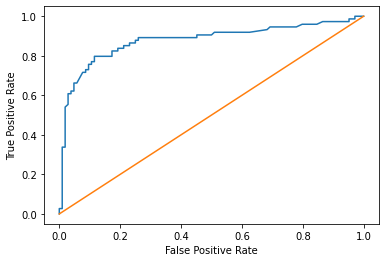

In [308]:
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_line, y_line)

In [309]:
pr1, re1, thresh1 = precision_recall_curve( y_test1, predictions_fine[:, 1] )

Text(0, 0.5, 'Recall')

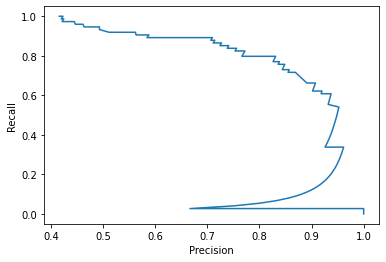

In [310]:
plt.plot(pr1, re1)
plt.xlabel('Precision')
plt.ylabel('Recall')

Сформулируйте выводы по проделанной работе.


a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

__________________________________________________________

Выводы:

1) Были сделаны следующие преобразования данных: удалены строковые данные и данные, не имеющие прогностической значимости; категориальные переменные переведены в числовые при помощи метода pd.get_dummies(); пропуски в данных о возрасте замещены средним возрастом; непрерывная переменная возраст (Age) переведена в категориальную (для построения диаграммы), а затем в числовую с помощью метода pd.get_dummies()

2) Точность прогноза модели после преобразования данных улучшилась (по сравнению с грубым удалением пропусков), что отображается повышением показателя score (в тренировочных и тестовых данных) и увеличением площади под кривой ROC. 

3) Считаю работу с данными одним из важных аспектов при проведении их анализа. Это повышает точность обучения модели и улучшает качество прогноза. *Возможно, в действительно больших данных пропуски имеет смысл просто удалять, т.к. размерность данных позволяет жертвовать потерями; также слишком большая размерность данных сама по себе является проблемой, и возникает вопрос о создании выборки оптимального объема (возможно - уменьшение размеров выборки) для решения поставленных задач.